# The ZTF Cadence

With what cadence does ZTF Observe? Let us see the distributions

In [1]:
import numpy as np
from tqdm.notebook import tqdm

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
# plt.style.use('seaborn-v0_8-colorblind')

In [2]:
base_directory = '/home/shoaib/ZTFDataChallenge/'
lightcurves_by_name_file = base_directory + "lightcurves_by_name_original_cadence.pkl"
lightcurves_by_oid_file = base_directory + "lightcurves_by_oid_original_cadence.pkl"

In [3]:
import sys
sys.path.insert(0, base_directory + 'dmdt_Analysis/')
from dmdt_functions import *

## Lightcurves by Name: Consecutive Time Differences

In [4]:
lightcurves_by_name = pd.read_pickle(lightcurves_by_name_file).dropna(axis=0)[['type', 'r_lightcurve', 'g_lightcurve']]
lightcurves_by_name

,type,r_lightcurve,g_lightcurve
0,AX,"[[58268.4470486, 17.2935829, 0.0198369212], [5...","[[58268.4661921, 17.2914085, 0.0193178076], [5..."
1,AX,"[[58432.3809954, 19.886844600000003, 0.1277610...","[[58390.4113657, 19.8996181, 0.129595727], [58..."
...,...,...,...
32229,QR,"[[58301.4430787, 17.906868, 0.0333674327], [58...","[[58298.4827431, 18.9552612, 0.063075698899999..."
32230,BRX,"[[58288.4649769, 18.7370911, 0.060006402400000...","[[58300.4637847, 19.7455463, 0.107512668], [58..."


In [5]:
def claculate_cadences(lightcurve):
    if (not isinstance(lightcurve, np.ndarray)) or (lightcurve.size <= 1):
        return np.nan
    return np.diff(lightcurve[:, 0])

lightcurves_by_name['r_cadences'] = lightcurves_by_name['r_lightcurve'].apply(lambda lightcurve: claculate_cadences(lightcurve))
lightcurves_by_name['g_cadences'] = lightcurves_by_name['g_lightcurve'].apply(lambda lightcurve: claculate_cadences(lightcurve)) 

QSOs_by_name = lightcurves_by_name[lightcurves_by_name['type'].isin(['Q', 'QR', 'QX'])]
nonQSOs_by_name = lightcurves_by_name[~lightcurves_by_name['type'].isin(['Q', 'QR', 'QX'])]

Qs_by_name = lightcurves_by_name[lightcurves_by_name['type'] == 'Q']
QRs_by_name = lightcurves_by_name[lightcurves_by_name['type'] == 'QR']
QXs_by_name = lightcurves_by_name[lightcurves_by_name['type'] == 'QX']

#### From 0 - 1000 days

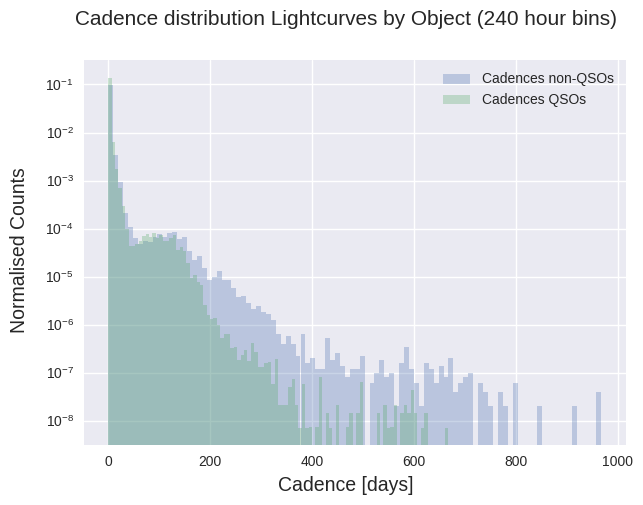

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
nbins = 100

nonQSOs_by_name_cadences = np.concat((np.concat(nonQSOs_by_name['r_cadences'].to_numpy()), np.concat(nonQSOs_by_name['g_cadences'].to_numpy())))
QSOs_by_name_cadences = np.concat((np.concat(QSOs_by_name['r_cadences'].to_numpy()), np.concat(QSOs_by_name['g_cadences'].to_numpy())))

_, nonQSO_bins, _ = ax.hist(nonQSOs_by_name_cadences, bins=100, alpha=0.3, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSOs_by_name_cadences, bins=100, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [days]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by Object ({24 * (1000 - 0) / nbins:.3g} hour bins)', size=15)

ax.legend()
plt.show()

Cool, this is a bit smooshed though, let's bin the cadences in log [days] and see how it looks.

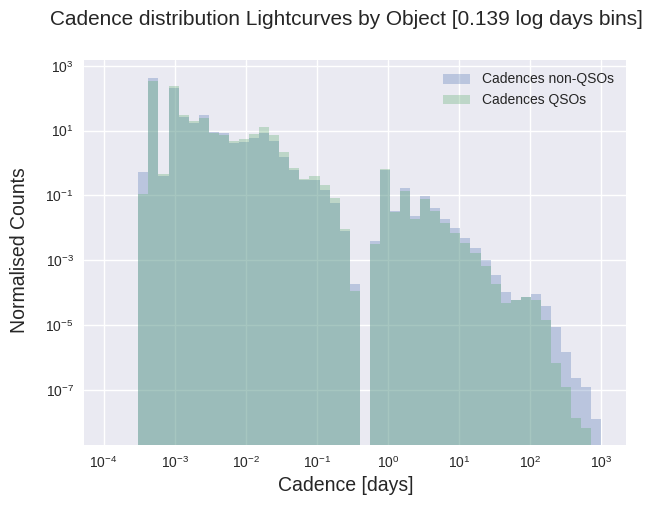

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
log_start_mjd, log_end_mjd, log_number_of_points = np.log10(10 / (24 * 3600)), np.log10(1000), 50
bins = np.logspace(log_start_mjd, log_end_mjd, log_number_of_points)

_, nonQSO_bins, _ = ax.hist(np.concat((np.concat(nonQSOs_by_name['r_cadences'].to_numpy()), np.concat(nonQSOs_by_name['g_cadences'].to_numpy()))),
                            bins=bins, alpha=0.3, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(np.concat((np.concat(QSOs_by_name['r_cadences'].to_numpy()), np.concat(QSOs_by_name['g_cadences'].to_numpy()))),
                         bins=bins, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
ax.set_xscale('log')

fig.supxlabel('Cadence [days]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by Object [{(log_end_mjd - log_start_mjd) / log_number_of_points:.3g} log days bins]', size=15)

ax.legend()
plt.show()

### From 0-2 days

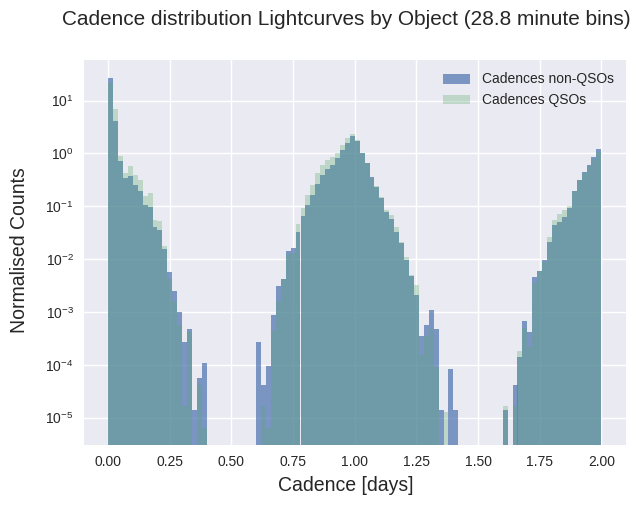

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
nbins = 100

nonQSO_cadences = np.concat((np.concat(nonQSOs_by_name['r_cadences'].to_numpy()), np.concat(nonQSOs_by_name['g_cadences'].to_numpy())))
QSO_cadences = np.concat((np.concat(QSOs_by_name['r_cadences'].to_numpy()), np.concat(QSOs_by_name['g_cadences'].to_numpy())))

_, nonQSO_bins, _ = ax.hist(nonQSO_cadences[(nonQSO_cadences >= 0) & (nonQSO_cadences < 2)], bins=100, alpha=0.7, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSO_cadences[(QSO_cadences >= 0) & (QSO_cadences < 2)], bins=100, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [days]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by Object ({24 * 60 * (2 - 0) / nbins:.3g} minute bins)', size=15)

ax.legend()
plt.show()

### From 0-1 Hours

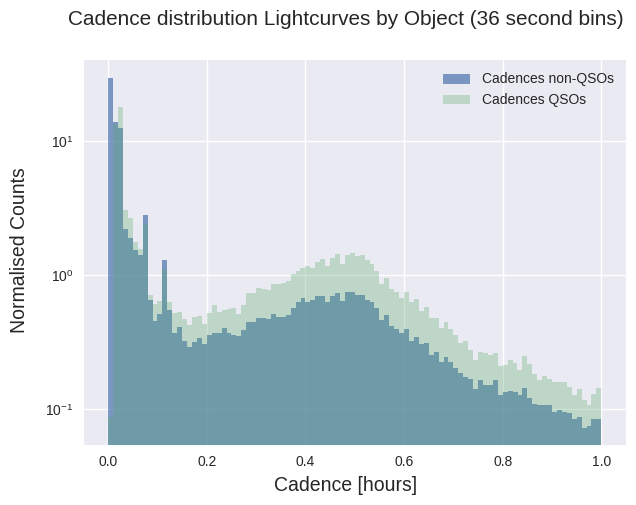

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
start_mjd_hour, end_mjd_hour, nbins = 0, 1, 100

nonQSO_cadences = 24 * np.concat((np.concat(nonQSOs_by_name['r_cadences'].to_numpy()), np.concat(nonQSOs_by_name['g_cadences'].to_numpy())))
QSO_cadences = 24 * np.concat((np.concat(QSOs_by_name['r_cadences'].to_numpy()), np.concat(QSOs_by_name['g_cadences'].to_numpy())))

_, nonQSO_bins, _ = ax.hist(nonQSO_cadences[(nonQSO_cadences >= start_mjd_hour) & (nonQSO_cadences < end_mjd_hour)], bins=nbins, alpha=0.7, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSO_cadences[(QSO_cadences >= start_mjd_hour) & (QSO_cadences < end_mjd_hour)], bins=nbins, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [hours]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by Object ({3600 * (end_mjd_hour - start_mjd_hour) / nbins:.3g} second bins)', size=15)

ax.legend()
plt.show()

### From 0 - 2 minutes

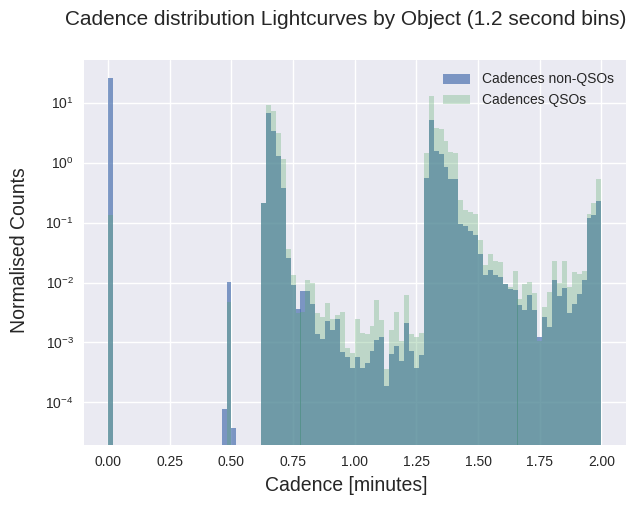

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
start_mjd_minute, end_mjd_minute, nbins = 0, 2, 100

nonQSO_cadences = 24 * 60 * np.concat((np.concat(nonQSOs_by_name['r_cadences'].to_numpy()), np.concat(nonQSOs_by_name['g_cadences'].to_numpy())))
QSO_cadences = 24 * 60 * np.concat((np.concat(QSOs_by_name['r_cadences'].to_numpy()), np.concat(QSOs_by_name['g_cadences'].to_numpy())))

_, nonQSO_bins, _ = ax.hist(nonQSO_cadences[(nonQSO_cadences >= start_mjd_minute) & (nonQSO_cadences < end_mjd_minute)], bins=nbins, alpha=0.7, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSO_cadences[(QSO_cadences >= start_mjd_minute) & (QSO_cadences < end_mjd_minute)], bins=nbins, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [minutes]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by Object ({60 * (end_mjd_minute - start_mjd_minute) / nbins:.3g} second bins)', size=15)

ax.legend()
plt.show()

## Lightcurves by OID: Consecutive Time Differences

In [11]:
lightcurves_by_oid = pd.read_pickle(lightcurves_by_oid_file).dropna(axis=0)[['type', 'band', 'lightcurve']]

#### From 0 - 200 days

In [12]:
lightcurves_by_oid['cadences'] = lightcurves_by_oid['lightcurve'].apply(lambda lightcurve: np.diff(lightcurve[:, 0]))

QSOs_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'].isin(['Q', 'QR', 'QX'])]
nonQSOs_by_oid = lightcurves_by_oid[~lightcurves_by_oid['type'].isin(['Q', 'QR', 'QX'])]

Qs_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'] == 'Q']
QRs_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'] == 'QR']
QXs_by_oid = lightcurves_by_oid[lightcurves_by_oid['type'] == 'QX']

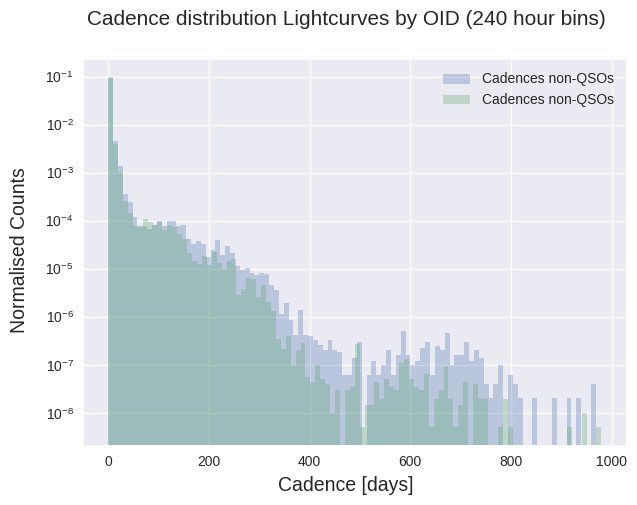

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
nbins = 100

_, nonQSO_bins, _ = ax.hist(np.concat(nonQSOs_by_oid['cadences'].to_numpy()), bins=100, alpha=0.3, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(np.concat(QSOs_by_oid['cadences'].to_numpy()), bins=100, alpha=0.3, density=True, label='Cadences non-QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [days]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by OID ({24 * (1000 - 0) / nbins:.3g} hour bins)', size=15)

ax.legend()
plt.show()

Now let's view this in log space

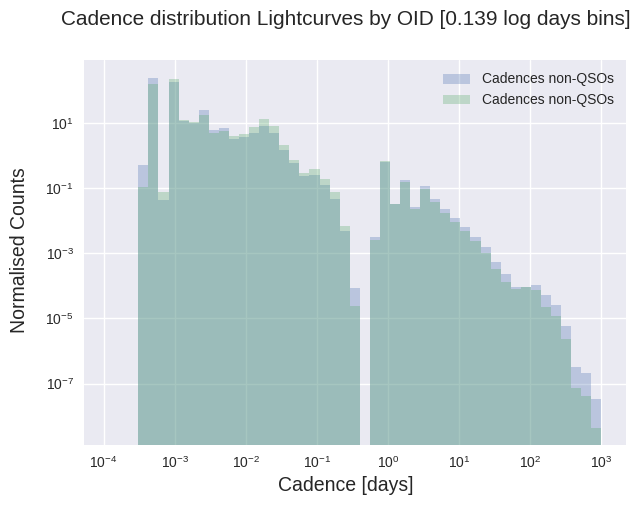

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
log_start_mjd, log_end_mjd, log_number_of_bins = np.log10(10 / (24 * 3600)), np.log10(1000), 50
bins = np.logspace(log_start_mjd, log_end_mjd, log_number_of_bins)

_, nonQSO_bins, _ = ax.hist(np.concat(nonQSOs_by_oid['cadences'].to_numpy()), bins=bins, alpha=0.3, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(np.concat(QSOs_by_oid['cadences'].to_numpy()), bins=bins, alpha=0.3, density=True, label='Cadences non-QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
ax.set_xscale('log')

fig.supxlabel('Cadence [days]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by OID [{(log_end_mjd - log_start_mjd) / log_number_of_bins:.3g} log days bins]', size=15)

ax.legend()
plt.show()

### 0 - 2 days

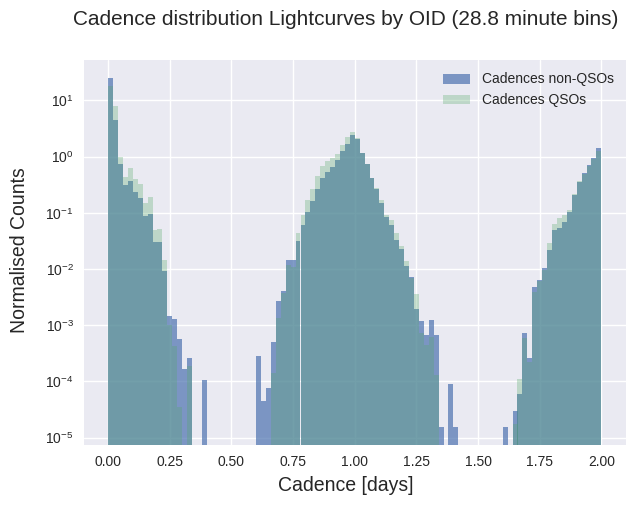

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))

nonQSO_cadences = np.concat(nonQSOs_by_oid['cadences'].to_numpy())
QSO_cadences = np.concat(QSOs_by_oid['cadences'].to_numpy())

_, nonQSO_bins, _ = ax.hist(nonQSO_cadences[(nonQSO_cadences >= 0) & (nonQSO_cadences < 2)], bins=100, alpha=0.7, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSO_cadences[(QSO_cadences >= 0) & (QSO_cadences < 2)], bins=100, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [days]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by OID ({24 * 60 * (2 - 0) / nbins:.3g} minute bins)', size=15)

ax.legend()
plt.show()

### 0-1 Hours

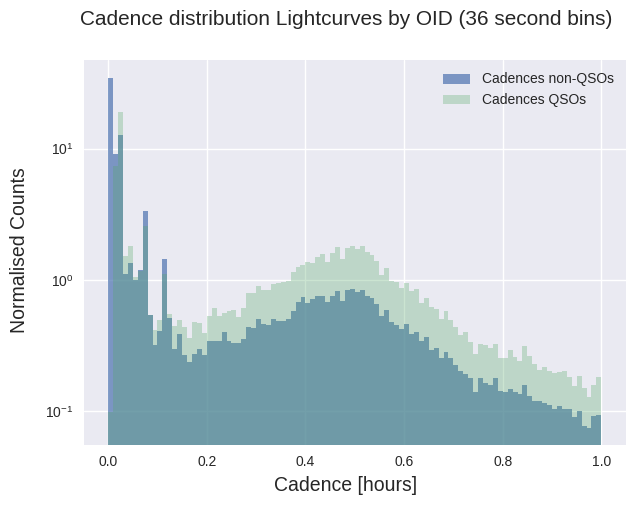

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
start_mjd_hour, end_mjd_hour, nbins = 0, 1, 100

nonQSO_cadences = 24 * np.concat(nonQSOs_by_oid['cadences'].to_numpy())
QSO_cadences = 24 * np.concat(QSOs_by_oid['cadences'].to_numpy())

_, nonQSO_bins, _ = ax.hist(nonQSO_cadences[(nonQSO_cadences >= start_mjd_hour) & (nonQSO_cadences < end_mjd_hour)], bins=nbins, alpha=0.7, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSO_cadences[(QSO_cadences >= start_mjd_hour) & (QSO_cadences < end_mjd_hour)], bins=nbins, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [hours]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by OID ({3600 * (end_mjd_hour - start_mjd_hour) / nbins:.3g} second bins)', size=15)

ax.legend()
plt.show()

### 0 - 2 Minutes

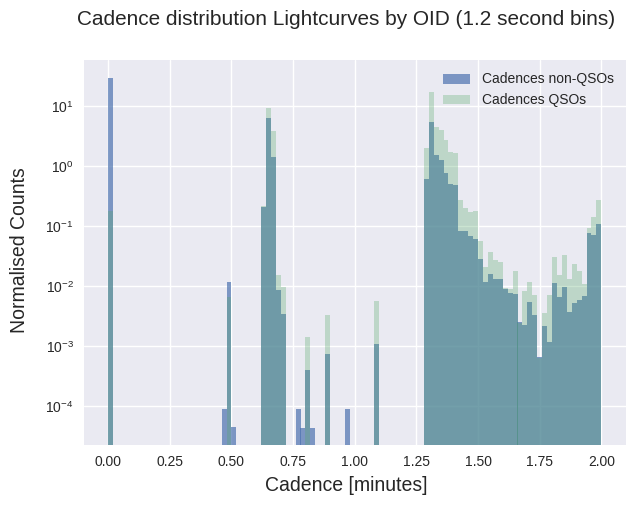

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
start_mjd_minute, end_mjd_minute, nbins = 0, 2, 100

nonQSO_cadences = 24 * 60 * np.concat(nonQSOs_by_oid['cadences'].to_numpy())
QSO_cadences = 24 * 60 * np.concat(QSOs_by_oid['cadences'].to_numpy())

_, nonQSO_bins, _ = ax.hist(nonQSO_cadences[(nonQSO_cadences >= start_mjd_minute) & (nonQSO_cadences < end_mjd_minute)], bins=nbins, alpha=0.7, density=True, label='Cadences non-QSOs', log=True)
_, QSO_bins, _ = ax.hist(QSO_cadences[(QSO_cadences >= start_mjd_minute) & (QSO_cadences < end_mjd_minute)], bins=nbins, alpha=0.3, density=True, label='Cadences QSOs', log=True)

# ax.set_xlim(0, 20)
# ax.set_ylim(0, 0.001)
# ax.set_xscale('log')

fig.supxlabel('Cadence [minutes]', size=14)
fig.supylabel('Normalised Counts', size=14)
fig.suptitle(f'Cadence distribution Lightcurves by OID ({60 * (end_mjd_minute - start_mjd_minute) / nbins:.3g} second bins)', size=15)

ax.legend()
plt.show()